In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set the style
plt.style.use('fivethirtyeight')

df = pd.read_csv('/content/Tweets.csv',sep='\t',names=['textID','text','selected_text','sentiment']) # Read the dataset.
df.head()

,textID,text,selected_text,sentiment
0,"textID,text,selected_text,sentiment",NaN,NaN,NaN
1,"cb774db0d1,"" I`d have responded, if I were goi...",NaN,NaN,NaN
2,"549e992a42, Sooo SAD I will miss you here in S...",NaN,NaN,NaN
3,"088c60f138,my boss is bullying me...,bullying ...",NaN,NaN,NaN
4,"9642c003ef, what interview! leave me alone,lea...",NaN,NaN,NaN


In [4]:
df.shape

(24695, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24695 entries, 0 to 24694
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   textID         24695 non-null  object 
 1   text           0 non-null      float64
 2   selected_text  0 non-null      float64
 3   sentiment      0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 771.8+ KB


In [10]:
# Display the column names of the dataset
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [19]:
df = pd.read_csv("Tweets.csv", encoding='utf-8')
df['sentiment'].value_counts().reset_index()

,sentiment,count
0,neutral,11118
1,positive,8582
2,negative,7781


In [20]:
#lowercase -> APpLe -> apple

s = 'APpLe'
s.lower()

'apple'

In [22]:
df['text'] = df['text'].apply(lambda x: str(x).lower() if pd.notnull(x) else "")


In [23]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [24]:
# Punctuation removeal
# ok... -> ok

In [25]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
s = 'ok...'
s2 = ''

for i in s:
    if i not in string.punctuation:
        s2 += i

s2

'ok'

In [28]:
def remove_punct(s):
    s2 = ''
    for i in s:
        if i not in string.punctuation:
            s2 += i

    return s2

In [29]:
s = 'ok! .ok...'
remove_punct(s)

'ok ok'

In [31]:
df['text'] = df['text'].apply(lambda x:remove_punct(x))

In [32]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego,Sooo SAD,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rel...,"Sons of ****,",negative


In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [35]:
text = 'i am very late to the school'
filtered_text = ''
for i in text.split():
    if i not in stop_words:
        filtered_text += ' ' + i

filtered_text.strip()

'late school'

In [36]:
def remove_stopwords(text):
    filtered_text = ''
    for i in text.split():
        if i not in stop_words:
            filtered_text += ' ' + i
    return filtered_text.strip()

In [37]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego,Sooo SAD,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rel...,"Sons of ****,",negative


In [38]:
text = 'i am very late to the school'
filtered_text = ''
for i in text.split():
    if len(i) > 2:
        filtered_text += ' ' + i

filtered_text.strip()

'very late the school'

In [39]:
def remove_words_less_than_two_chars(text):
    filtered_text = ''
    for i in text.split():
        if len(i) > 2:
            filtered_text += ' ' + i
    return filtered_text.strip()

In [40]:
df['text'] = df['text'].apply(lambda x:remove_words_less_than_two_chars(x))


In [41]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,have responded were going,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad will miss you here san diego,Sooo SAD,negative
2,088c60f138,boss bullying,bullying me,negative
3,9642c003ef,what interview leave alone,leave me alone,negative
4,358bd9e861,sons why couldnt they put them the releases al...,"Sons of ****,",negative


In [42]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
'died', 'agreed', 'owned', 'humbled', 'sized',
'meeting', 'stating', 'siezing', 'itemization',
'sensational', 'traditional', 'reference', 'colonizer',
'plotted']

singles = [stemmer.stem(plural) for plural in plurals]

In [43]:
singles

['caress',
 'fli',
 'die',
 'mule',
 'deni',
 'die',
 'agre',
 'own',
 'humbl',
 'size',
 'meet',
 'state',
 'siez',
 'item',
 'sensat',
 'tradit',
 'refer',
 'colon',
 'plot']

In [44]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [45]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [46]:
lemma_res = [wnl.lemmatize(plural) for plural in plurals]
lemma_res

['caress',
 'fly',
 'dy',
 'mule',
 'denied',
 'died',
 'agreed',
 'owned',
 'humbled',
 'sized',
 'meeting',
 'stating',
 'siezing',
 'itemization',
 'sensational',
 'traditional',
 'reference',
 'colonizer',
 'plotted']

In [47]:
import spacy

# Define a text string
text = "This is a sample text. It contains some words that we can use for lemmatization."

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(text)

# Lemmatize each token and print the result
for token in doc:
  lemma = token.lemma_
  print(token.text, "-->", lemma)

This --> this
is --> be
a --> a
sample --> sample
text --> text
. --> .
It --> it
contains --> contain
some --> some
words --> word
that --> that
we --> we
can --> can
use --> use
for --> for
lemmatization --> lemmatization
. --> .


In [48]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

text = 'i am going to school every weekend.'
processed_text = ''

for i in text.split():
    stem_word = stemmer.stem(i)
    processed_text += ' ' + stem_word

processed_text.strip()

'i am go to school everi weekend.'

In [49]:
text = 'i am going to school every weekend.'
processed_text = ''

for i in text.split():
    stem_word = wnl.lemmatize(i)
    processed_text += ' ' + stem_word

processed_text.strip()

'i am going to school every weekend.'

In [50]:
text = 'i am going to school every weekend.'
processed_text = ''

doc = nlp(text)
for token in doc:
    lemma = token.lemma_
    processed_text += ' ' + lemma

processed_text.strip()

'I be go to school every weekend .'

In [51]:
def stemming_text(text):
    processed_text = ''

    for i in text.split():
        stem_word = stemmer.stem(i)
        processed_text += ' ' + stem_word

    return processed_text.strip()

In [52]:
df['text'] = df['text'].apply(lambda x:stemming_text(x))


In [53]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,have respond were go,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad will miss you here san diego,Sooo SAD,negative
2,088c60f138,boss bulli,bullying me,negative
3,9642c003ef,what interview leav alon,leave me alone,negative
4,358bd9e861,son whi couldnt they put them the releas alrea...,"Sons of ****,",negative


In [54]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 64.1 MB/s eta 0:00:00


In [55]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    print(word)
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

hapenning
happening
{'penning', 'apennine', 'japanning', 'happening'}


In [56]:
text = 'it is hapenning'
misspelled = spell.unknown(text.split())

preproessed_text = ''
for word in text.split():
    if word in misspelled:
        cw = spell.correction(word)
        preproessed_text += ' ' + cw
    else:
        preproessed_text += ' ' + word

preproessed_text.strip()

'it is happening'

In [57]:
def spell_correction(text):
    misspelled = spell.unknown(text.split())

    preproessed_text = ''
    for word in text.split():
        cw = spell.correction(word)
        if cw != None:
            preproessed_text += ' ' + cw
        else:
            preproessed_text += ' ' + word
    else:
        preproessed_text += ' ' + word
    return preproessed_text.strip()

In [58]:
from tqdm.notebook import tqdm
tqdm.pandas()
# df['text'] = df['text'].progress_applu(lambda x:spell_correction(x))

In [59]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,have respond were go,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad will miss you here san diego,Sooo SAD,negative
2,088c60f138,boss bulli,bullying me,negative
3,9642c003ef,what interview leav alon,leave me alone,negative
4,358bd9e861,son whi couldnt they put them the releas alrea...,"Sons of ****,",negative


In [60]:
X = df['text']
y = df['sentiment']

In [61]:
X

,text
0,have respond were go
1,sooo sad will miss you here san diego
2,boss bulli
3,what interview leav alon
4,son whi couldnt they put them the releas alrea...
...,...
27476,wish could come see denver husband lost his jo...
27477,ive wonder about rake the client has made clea...
27478,yay good for both you enjoy the break you prob...
27479,but was worth


In [62]:
y

,sentiment
0,neutral
1,negative
2,negative
3,negative
4,negative
...,...
27476,negative
27477,negative
27478,positive
27479,positive


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
X_train

,text
25642,aww way make feel special
14874,but that week away sure got onli tweet night b...
3124,httptwitpiccom4jam0 better light would have en...
2077,that it welsh name
13381,rest peac marshal
...,...
1343,more follow follow and ill love you pout pleas
5712,good morn all hope everyon do well this monday...
2270,you alway seem know exact the right thing say ...
14901,yeahsh pass last week sad


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [66]:
X_train.shape, y_train.shape

((21984, 5000), (21984,))

In [67]:
X_test.shape, y_test.shape

((5497, 5000), (5497,))

In [68]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [69]:
from sklearn.metrics import accuracy_score

# Make Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy: ',test_accuracy)

Train Accuracy: 0.8216885007278021
Test Accuracy:  0.7023831180643988


In [70]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.8252369977393145
Test Accuracy: 0.7041520408703573


In [71]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_test_pred)

array([[1082,  397,   96],
       [ 381, 1453,  328],
       [ 105,  329, 1326]])

In [72]:
y_test.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

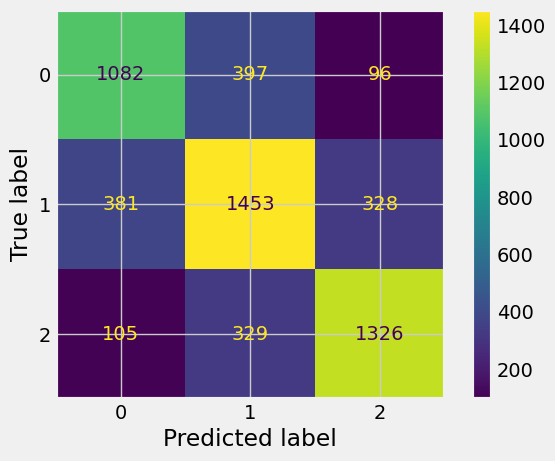

In [73]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [74]:
(329)/(329+105)

0.7580645161290323

In [75]:
param_grid = {'penalty':['l1', 'l2'],
              'C':[0.01,0.1,1,10,100],
              'class_weight':[None,'balanced']}

In [76]:
from sklearn.model_selection import GridSearchCV
grid_serach_cv = GridSearchCV(lr,
                              param_grid,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              cv=3)


In [77]:
grid_serach_cv

GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [78]:
grid_serach_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(**grid_serach_cv.best_params_)
lr.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced')

In [80]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.7590975254730713
Test Accuracy: 0.7134800800436601


In [81]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.7606245946676995
Test Accuracy: 0.7122131317135941


In [82]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_test_pred)

array([[1077,  411,   87],
       [ 332, 1549,  281],
       [ 102,  362, 1296]])

In [83]:
y_test.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

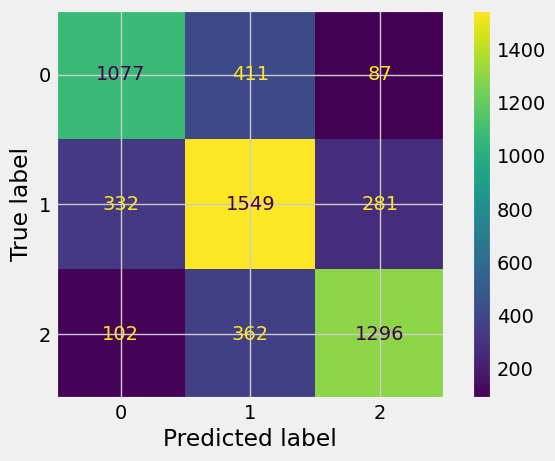

In [84]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [85]:
(362)/(362/102)

102.0

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9970887918486172
Test Accuracy: 0.661997453156267


In [88]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.997051398995629
Test Accuracy: 0.662052363643483


In [89]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_test_pred)

array([[ 983,  449,  143],
       [ 414, 1392,  356],
       [ 111,  385, 1264]])

In [90]:
y_test.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

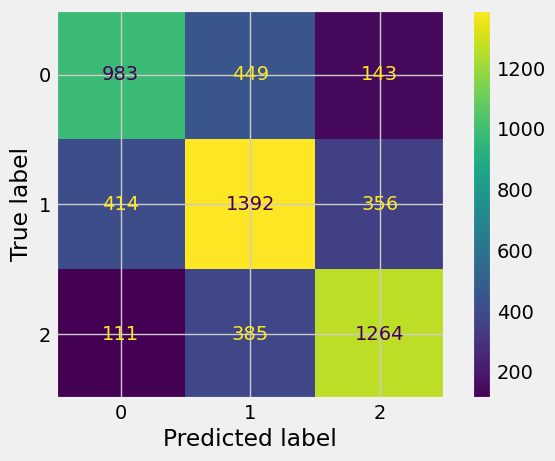

In [91]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [92]:
(385)/(385+111)

0.7762096774193549

In [93]:
param_grid = {'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':list(range(10,101,5)),
              'class_weight':[None,'balanced']}

In [97]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(10, 101, 10)),  # Your depth_list
    'class_weight': [None, 'balanced']
}


In [98]:
from sklearn.model_selection import GridSearchCV
grid_serach_cv = GridSearchCV(dt,
                              param_grid,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              cv=3)

In [99]:
grid_serach_cv

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'splitter': ['best', 'random']},
             scoring='balanced_accuracy')

In [100]:
grid_serach_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'splitter': ['best', 'random']},
             scoring='balanced_accuracy')

In [102]:
grid_serach_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 100,
 'splitter': 'random'}

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(**grid_serach_cv.best_params_)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       splitter='random')

In [104]:
from sklearn.metrics import accuracy_score

# Make Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy : ', train_accuracy)
print('Test  Accuracy : ', test_accuracy)

Train Accuracy :  0.8627638282387191
Test  Accuracy :  0.6841913771147898


In [105]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.8462656844933744
Test Accuracy: 0.671610909989726


In [106]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_test_pred)

array([[ 860,  609,  106],
       [ 230, 1699,  233],
       [  91,  467, 1202]])

In [107]:
y_test.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

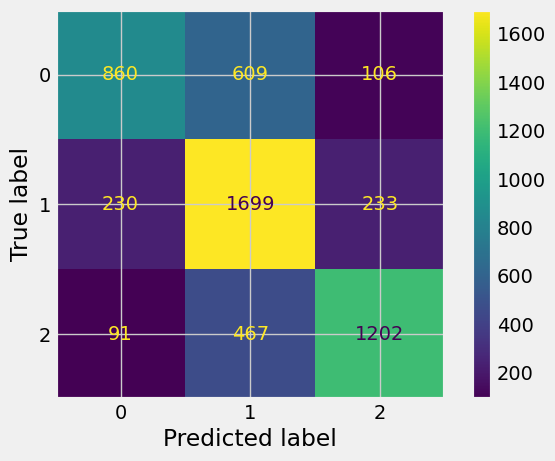

In [108]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [109]:
(467)/(467+91)

0.8369175627240143

In [111]:
import joblib
joblib.dump(lr,'model.joblib')
joblib.dump(vectorizer,'vectorizer.joblib')

['vectorizer.joblib']

In [112]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [119]:
def proproess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    text = remove_stopwords(text)
    text = remove_words_less_than_two_chars(text)
    text = stemming_text(text)
    # text = spell_correction(text)
    return text

In [120]:
text = ' as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff'
text = proproess_text(text)
text

'much love hope reckon chanc minim never gonna get cake stuff'

In [121]:
arr = vectorizer.transform([text])
pred = lr.predict(arr)
pred

array(['positive'], dtype=object)

In [122]:
pred = np.max(lr.predict_proba(arr))
pred

np.float64(0.8360804018589764)